# Example of plotting images and cell masks with squidpy

## Load packages required

In [1]:
import os
from pathlib import Path
import sys
node_type = os.getenv('BB_CPU')
venv_dir = f'/rds/projects/g/gilberts-spatial-biology-image-analysis/Chris/my-virtual-env-icelake'  # edit this line to match the venv directory format
venv_site_pkgs = Path(venv_dir) / 'lib' / f'python{sys.version_info.major}.{sys.version_info.minor}' / 'site-packages'
if venv_site_pkgs.exists():
    sys.path.insert(0, str(venv_site_pkgs))
else:
    print(f"Path '{venv_site_pkgs}' not found. Check that it exists and/or that it exists for node-type '{node_type}'.")

import spatialdata as sd
from spatialdata_io import xenium

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq



sdata = xenium("/rds/projects/c/croftap-mapjagx1/data/data/wei/Xenium/Xenium_Chris/20231107__215641__110723_lungv46_synovium/output-XETG00150__0013726__2518-11__20231107__215839")
sdata

/rds/bear-apps/2022a/EL8-ice/software/Python/3.10.4-GCCcore-11.3.0/lib/python3.10/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
/tmp/ipykernel_800856/880642421.py:23: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata = xenium("/rds/projects/c/croftap-mapjagx1/data/data/wei/Xenium/Xenium_Chris/20231107__215641__110723_lungv46_synovium/output-XETG00150__0013726__2518-11__20231107__215839")


INFO     reading                                                                                                   
         /rds/projects/c/croftap-mapjagx1/data/data/wei/Xenium/Xenium_Chris/20231107__215641__110723_lungv46_synovi
         um/output-XETG00150__0013726__2518-11__20231107__215839/cell_feature_matrix.h5                            


SpatialData object
├── Images
│     ├── 'morphology_focus': DataTree[cyx] (1, 23732, 31086), (1, 11866, 15543), (1, 5933, 7771), (1, 2966, 3885), (1, 1483, 1942)
│     └── 'morphology_mip': DataTree[cyx] (1, 23732, 31086), (1, 11866, 15543), (1, 5933, 7771), (1, 2966, 3885), (1, 1483, 1942)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (23732, 31086), (11866, 15543), (5933, 7771), (2966, 3885), (1483, 1942)
│     └── 'nucleus_labels': DataTree[yx] (23732, 31086), (11866, 15543), (5933, 7771), (2966, 3885), (1483, 1942)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 10) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (7741, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (7741, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (7741, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (7741, 377)
with coordinate systems:
    ▸ 'global', with elements:
        morphology_focus (Images), morphology_mip (Image

## Plot Morphology- On this Xenium V1 example, there is only DAPI no other IF, but more updated data Xenoium runs

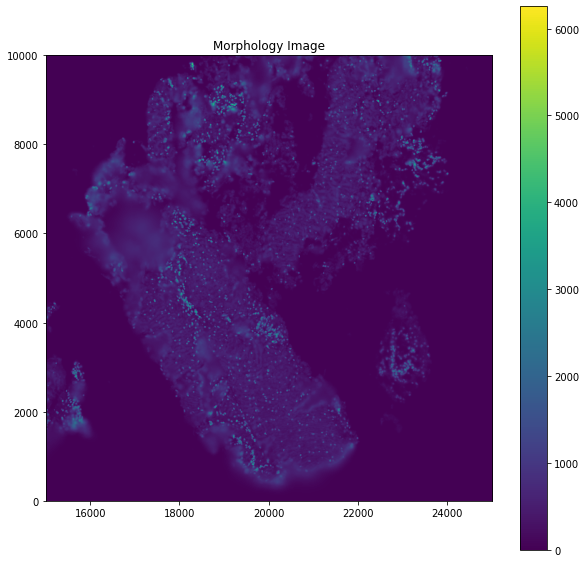

In [4]:
import matplotlib.pyplot as plt
import spatialdata_plot
from spatialdata import bounding_box_query

fig, ax = plt.subplots(figsize=(10, 10))

# Render the image and display it
sdata.pl.render_images("morphology_focus").pl.show(ax=ax, title="Morphology Image")

# Set the crop boundaries (adjust the values to your desired crop area)
ax.set_xlim(left=15_000, right=25_000)  # Example x-axis limits for cropping
ax.set_ylim(bottom=0, top=10_000)  # Example y-axis limits for cropping

# Show the cropped plot
plt.show()

## Next plot cell masks

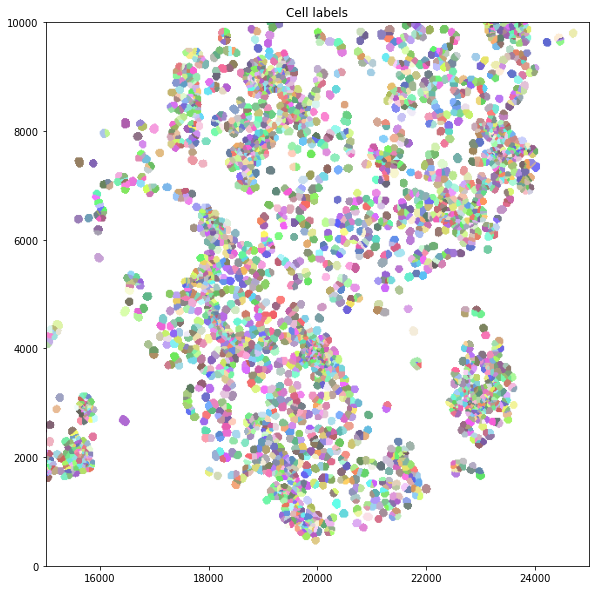

In [5]:
from spatialdata import bounding_box_query

fig, ax = plt.subplots(figsize=(10, 10))

# Render the image and display it
#sdata.pl.render_images("cell_boundaries").pl.show(ax=ax, title="Morphology Image")

sdata.pl.render_labels("cell_labels").pl.show(ax=ax, title="Cell labels", coordinate_systems="global")

# Set the crop boundaries (adjust the values to your desired crop area)
ax.set_xlim(left=15_000, right=25_000)  # Example x-axis limits for cropping
ax.set_ylim(bottom=0, top=10_000)  # Example y-axis limits for cropping

# Show the cropped plot
plt.show()

## And now a zoomed in look at cell masks with DAPI

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


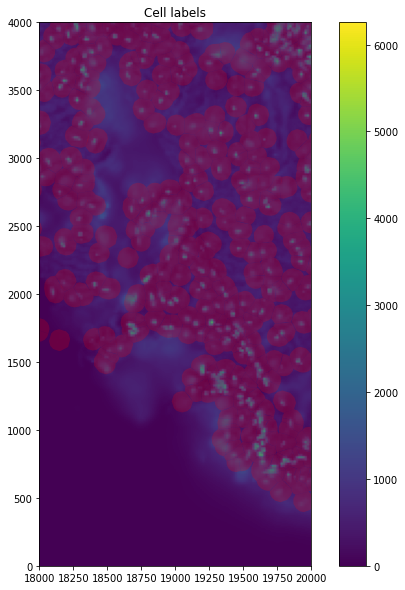

In [6]:
from spatialdata import bounding_box_query

fig, ax = plt.subplots(figsize=(10, 10))

# Render the image and display it
sdata.pl.render_images("morphology_focus").pl.show(ax=ax, title="Morphology Image")
sdata.pl.render_shapes("cell_boundaries", fill_alpha = 0.2, color="red").pl.show(ax=ax, title="Cell labels", coordinate_systems="global")

# Set the crop boundaries (adjust the values to your desired crop area)
ax.set_xlim(left=18_000, right=20_000)  # Example x-axis limits for cropping
ax.set_ylim(bottom=0, top=4000)  # Example y-axis limits for cropping

# Show the cropped plot
plt.show()

## And coloring cells

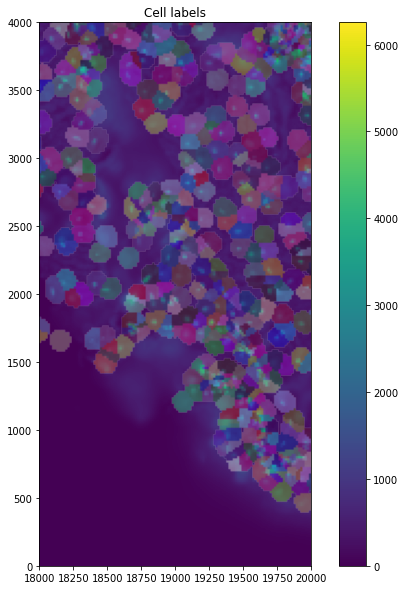

In [7]:
from spatialdata import bounding_box_query

fig, ax = plt.subplots(figsize=(10, 10))

# Render the image and display it
sdata.pl.render_images("morphology_focus").pl.show(ax=ax, title="Morphology Image")
#sdata.pl.render_shapes("cell_boundaries", fill_alpha = 0.2, color="red").pl.show(ax=ax, title="Cell labels", coordinate_systems="global")
sdata.pl.render_labels("cell_labels", fill_alpha = 0.2).pl.show(ax=ax, title="Cell labels", coordinate_systems="global")

# Set the crop boundaries (adjust the values to your desired crop area)
ax.set_xlim(left=18_000, right=20_000)  # Example x-axis limits for cropping
ax.set_ylim(bottom=0, top=4000)  # Example y-axis limits for cropping

# Show the cropped plot
plt.show()

## Now checking nuc masks

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      


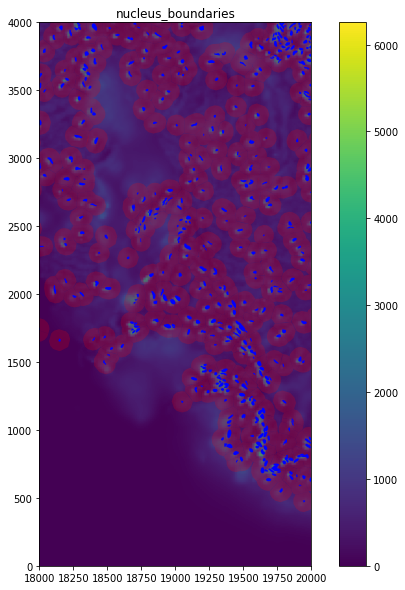

In [8]:
from spatialdata import bounding_box_query

fig, ax = plt.subplots(figsize=(10, 10))

# Render the image and display it
sdata.pl.render_images("morphology_focus").pl.show(ax=ax, title="Morphology Image")
sdata.pl.render_shapes("cell_boundaries", fill_alpha = 0.2, color="red").pl.show(ax=ax, title="Cell labels", coordinate_systems="global")
sdata.pl.render_shapes("nucleus_boundaries", color="blue").pl.show(ax=ax, title="nucleus_boundaries", coordinate_systems="global")

 

# Set the crop boundaries (adjust the values to your desired crop area)
ax.set_xlim(left=18_000, right=20_000)  # Example x-axis limits for cropping
ax.set_ylim(bottom=0, top=4000)  # Example y-axis limits for cropping

# Show the cropped plot
plt.show()

## And plotting tx for a gene of interest

INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     Value for parameter 'color' appears to be a color, using it as such.                                      
INFO     input has more than 103 categories. Uniform 'grey' color will be used for all categories.                 


/rds/projects/g/gilberts-spatial-biology-image-analysis/Chris/my-virtual-env-icelake/lib/python3.10/site-packages/anndata/_core/anndata.py:402: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/rds/projects/g/gilberts-spatial-biology-image-analysis/Chris/my-virtual-env-icelake/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/rds/projects/g/gilberts-spatial-biology-image-analysis/Chris/my-virtual-env-icelake/lib/python3.10/site-packages/spatialdata/_core/_elements.py:106: UserWarning: Key `transcripts` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/rds/projects/g/gilberts-spatial-biology-image-analysis/Chris/my-virtual-env-icelake/lib/python3.10/site-packages/spatialdata_plot/pl/utils.py:782: FutureWarning: The default value of 'ignore' for the `

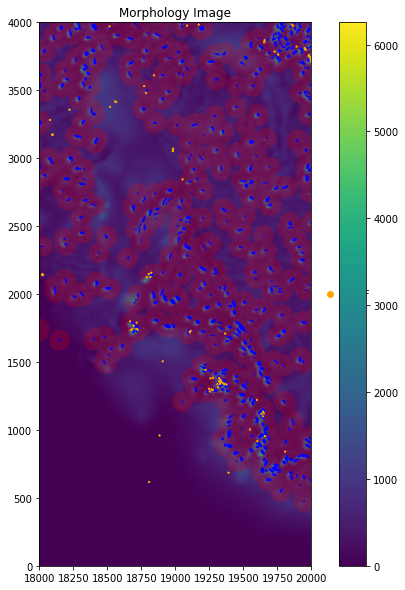

In [9]:
from spatialdata import bounding_box_query

fig, ax = plt.subplots(figsize=(10, 10))

# Render the image and display it
sdata.pl.render_images("morphology_focus").pl.show(ax=ax, title="Morphology Image")
sdata.pl.render_shapes("cell_boundaries", fill_alpha = 0.2, color="red").pl.show(ax=ax, title="Cell labels", coordinate_systems="global")
sdata.pl.render_shapes("nucleus_boundaries", color="blue").pl.show(ax=ax, title="nucleus_boundaries", coordinate_systems="global")

sdata.pl.render_points(
    "transcripts",
    color="feature_name",
    groups='VWF',
    palette="orange",
).pl.show(ax=ax, title="Morphology Image")


# Set the crop boundaries (adjust the values to your desired crop area)
ax.set_xlim(left=18_000, right=20_000)  # Example x-axis limits for cropping
ax.set_ylim(bottom=0, top=4000)  # Example y-axis limits for cropping

# Show the cropped plot
plt.show()